# Rede convolucional para classificação de dígitos manuscritos

Importando funções necessárias das bibliotecas

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report

Lendo e normalizando os dados de treinamento e de teste

In [ ]:
batch_size = 128
num_classes = 10
epochs = 5

In [ ]:
# dimensões da imagem de entrada
img_rows, img_cols = 28, 28

# carregamento dos dados de treinamento e de teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# use apenas uma fração dos dados de treinamento/teste
x_train=x_train[1:7501]
y_train=y_train[1:7501]
x_test=x_test[1:1251]
y_test=y_test[1:1251]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_train.shape)
print(x_train.shape[0], 'exemplos de treino')
print(x_test.shape[0], 'exemplos de teste')

# converte as saídas para matrizes binárias (one hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])
print(y_train[1])

x_train shape: (7500, 28, 28, 1)
x_test shape: (7500, 28, 28, 1)
7500 exemplos de treino
1250 exemplos de teste
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Parâmetros de *treinamento*

Definindo e compilando a rede neural convolucional

In [ ]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Treinamento da rede convolucional

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Perda do teste:', score[0])
print('Acurácia do teste:', score[1])

Train on 7500 samples, validate on 1250 samples
Epoch 1/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.7667 - accuracy: 0.7552 - val_loss: 0.3595 - val_accuracy: 0.8920
Epoch 2/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.1889 - accuracy: 0.9460 - val_loss: 0.1910 - val_accuracy: 0.9344
Epoch 3/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.1174 - accuracy: 0.9665 - val_loss: 0.1290 - val_accuracy: 0.9568
Epoch 4/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.0878 - accuracy: 0.9743 - val_loss: 0.1347 - val_accuracy: 0.9528
Epoch 5/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.0657 - accuracy: 0.9809 - val_loss: 0.1038 - val_accuracy: 0.9616
Perda do teste: 0.10383547875061631
Acurácia do teste: 0.9616000056266785


Avaliação de performance utilizando matriz de confusão e outras estatísticas de acerto (precisão, revocação, f1 etc)

In [ ]:
#obtem as saídas reais do modelo treinado, recebendo o cj. de teste como entrada
y_pred = model.predict(x_test)

#converte para números inteiros as saídas desejadas e saídas da predição
y_pred_int = y_pred.argmax(axis=1)
y_test_int = y_test.argmax(axis=1)
print(y_pred_int[0])
print(y_test_int[0])

#apresenta a matriz de confusão
print(confusion_matrix(y_test_int, y_pred_int))
print()

#apresenta o relatório de classificação
print(classification_report(y_test_int, y_pred_int))

2
2
[[104   0   0   0   0   1   1   0   0   0]
 [  0 155   0   0   0   0   0   0   0   0]
 [  0   1 135   0   0   0   1   2   1   0]
 [  0   0   0 123   0   5   0   2   1   0]
 [  0   0   0   0 136   0   2   0   0   1]
 [  0   0   0   0   0 110   0   0   1   0]
 [  2   1   0   0   0   2 102   0   1   0]
 [  0   1   2   0   0   0   0 125   0   0]
 [  0   1   1   2   1   0   0   2 108   0]
 [  0   1   0   0   1   3   0   4   4 104]]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.97      1.00      0.98       155
           2       0.98      0.96      0.97       140
           3       0.98      0.94      0.96       131
           4       0.99      0.98      0.98       139
           5       0.91      0.99      0.95       111
           6       0.96      0.94      0.95       108
           7       0.93      0.98      0.95       128
           8       0.93      0.94      0.94       115
           9       0.99

##Agora é a sua vez
**Aproveitando o código anterior, escreva um programa que imprima as matrizes de confusão de 3 versões modificadas (gradualmente mais simples) da rede neural original. Cada versão deverá ter 1/2, 1/4 e 1/8 de filtros convolucionais e de neurônios na camada densa. Como ficaram os resultados? Melhoraram? Pioraram? Procure fornecer uma explicação.**

In [ ]:
import numpy as np
loss_list = [[],[],[],[]]
acc_list = [[],[],[],[]]
mult_base = [1,0.5,0.25,0.125]


In [ ]:
for CNN_version in np.arange(0,4,1):
  print("TREINAMENTO COM ", mult_base[CNN_version]*100,"% DOS FILTROS \n")
  model = Sequential()
  model.add(Conv2D(int(16*mult_base[CNN_version]), kernel_size=(5, 5),
                  activation='relu',
                  input_shape=input_shape))
  model.add(Conv2D(int(32*mult_base[CNN_version]),kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(int(64*mult_base[CNN_version]), activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  y_pred = model.predict(x_test)

  loss_list[CNN_version].append(history.history['loss'])
  acc_list[CNN_version].append(history.history['accuracy'])

  #converte para números inteiros as saídas desejadas e saídas da predição
  y_pred_int = y_pred.argmax(axis=1)
  y_test_int = y_test.argmax(axis=1)


  print(confusion_matrix(y_test_int, y_pred_int))

TREINAMENTO COM  100 % DOS FILTROS 

Train on 7500 samples, validate on 1250 samples
Epoch 1/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.8018 - accuracy: 0.7397 - val_loss: 0.3037 - val_accuracy: 0.9096
Epoch 2/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.1721 - accuracy: 0.9505 - val_loss: 0.1885 - val_accuracy: 0.9408
Epoch 3/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.1059 - accuracy: 0.9713 - val_loss: 0.1734 - val_accuracy: 0.9456
Epoch 4/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.0794 - accuracy: 0.9772 - val_loss: 0.1081 - val_accuracy: 0.9648
Epoch 5/5
7500/7500 [==============================] - 11s 1ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.1011 - val_accuracy: 0.9704
[[103   0   1   0   0   0   2   0   0   0]
 [  0 152   0   1   0   0   1   0   1   0]
 [  0   0 134   0   0   0   0   2   4   0]
 [  0   0   0 129   0   1   0   0   1   0]
 [  0   0   0   0 134  

# Como se sabe, a cada camada, o número de filtros está diretamente relacionado com o número de mapas de características extraídos. Estes, por sua vez, dizem respeito ao número de características possivelmente aprendidos pela rede. Ou seja, ao diminuir o número de filtros perde-se muito da capacidade de aprendizado da rede. No entanto, pelo fato da rede ser uma espécie de caixa-preta, não é possível correlacionar diretamente essas mudanças com as métricas de performance, apenas analisar os resultados. 

# O que pode-se observar a partir da célula de código acima é que a matriz de confusão, à medida em que se diminui o número de filtros o número de verdadeiros positivos diminui e o número de falsos positivos aumenta, para grande maioria dos dígitos. Ou seja, o modelo tem sua capacidade de diferenciação afetada.

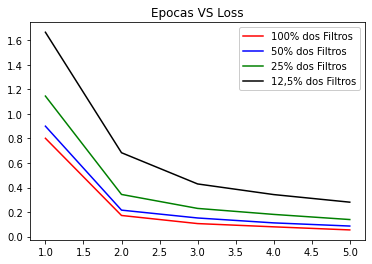

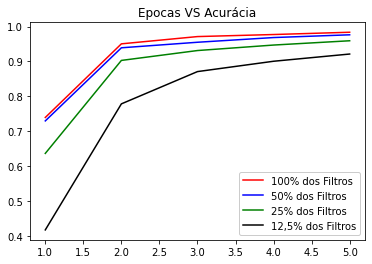

In [ ]:
import matplotlib.pyplot as plt
epochs = range(1,6)
plt.title('Epocas VS Loss')
plt.plot(epochs, loss_list[0][0], 'r',label='100% dos Filtros')
plt.plot(epochs, loss_list[1][0], 'b',label='50% dos Filtros')
plt.plot(epochs, loss_list[2][0], 'g',label='25% dos Filtros')
plt.plot(epochs, loss_list[3][0], 'black',label='12,5% dos Filtros')
plt.legend(framealpha=1, frameon=True);

plt.show()

plt.title('Epocas VS Acurácia')
plt.plot(epochs, acc_list[0][0], 'r',label='100% dos Filtros')
plt.plot(epochs, acc_list[1][0], 'b',label='50% dos Filtros')
plt.plot(epochs, acc_list[2][0], 'g',label='25% dos Filtros')
plt.plot(epochs, acc_list[3][0], 'black',label='12,5% dos Filtros')
plt.legend(framealpha=1, frameon=True);


#loss_list


# O que pode-se observar a partir dos gráficos acima é que, à medida em que se diminui a quantidade de filtros, após atingir a convergência, a acurácia diminui e o loss aumenta. Com isso é possível afirmar que quando o número de filtros é decrescido, a rede perde parte da sua capacidade de detecção de características, resultando em um modelo de classificação mais impreciso.

##Bonus
Reduza as dimensões da imagem de entrada para 14x14 e repita o teste anterior. As conclusões serão as mesmas? Comente.

In [ ]:
# dimensões da imagem de entrada
img_rows, img_cols = 14, 14

# carregamento dos dados de treinamento e de teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# use apenas uma fração dos dados de treinamento/teste
x_train=x_train[1:7501]
y_train=y_train[1:7501]
x_test=x_test[1:1251]
y_test=y_test[1:1251]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('x_test shape:', x_train.shape)
print(x_train.shape[0], 'exemplos de treino')
print(x_test.shape[0], 'exemplos de teste')

# converte as saídas para matrizes binárias (one hot encoding)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

ValueError: ignored

In [ ]:
x_train.shape

(7500, 28, 28)

In [ ]:
import numpy as np
loss_list_2 = [[],[],[],[]]
acc_list_2 = [[],[],[],[]]
mult_base_2 = [1,0.5,0.25,0.125]


for CNN_version in np.arange(0,4,1):
  print("TREINAMENTO COM ", mult_base[CNN_version]*100,"% DOS FILTROS \n")
  model = Sequential()
  model.add(Conv2D(int(16*mult_base[CNN_version]), kernel_size=(5, 5),
                  activation='relu',
                  input_shape=input_shape))
  model.add(Conv2D(int(32*mult_base[CNN_version]),kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(int(64*mult_base[CNN_version]), activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
  score = model.evaluate(x_test, y_test, verbose=0)
  y_pred = model.predict(x_test)

  loss_list[CNN_version].append(history.history['loss'])
  acc_list[CNN_version].append(history.history['accuracy'])

  #converte para números inteiros as saídas desejadas e saídas da predição
  y_pred_int = y_pred.argmax(axis=1)
  y_test_int = y_test.argmax(axis=1)


  print(confusion_matrix(y_test_int, y_pred_int))

TREINAMENTO COM  100 % DOS FILTROS 



ValueError: ignored